In [108]:
import numpy as np
from random import random
import math
#best_array_small = []
#best_array_big = []
best_std = 1000

distance_light = 80

for k in range (0, 1000):
    array_big = np.zeros([50,100])
    array_small = np.zeros([50,100])
    for light in range(0,15):
        x_coord = int(random()*100)
        y_coord = int(random()*50)
        array_big[y_coord, x_coord] = 1
        array_big[49 - y_coord, x_coord] = 1
        array_big[y_coord, 99 - x_coord] = 1
        array_big[49 - y_coord, 99 - x_coord] = 1
        
        #loop over each "element" in small array that will see light at the given distance
        light_degrees = 50
        r_light_circle = distance_light * math.tan(light_degrees*(math.pi/180))
        #print(r_light_circle)
        for x in range(int(-r_light_circle), int(r_light_circle)):
            for y in range(int(-r_light_circle), int(r_light_circle)):
                distance = x**2 + y**2
                angle = math.atan(distance/distance_light)
                if distance < r_light_circle:
                    intensity = round(math.cos(angle)**3,3)
                    if (0<=(y_coord + y)<50) and (0<=(x_coord + x)<100):
                        array_small[y_coord + y, x_coord + x] += intensity
                        array_small[49 - y_coord - y, x_coord + x] += intensity
                        array_small[y_coord + y, 99 - x_coord - x] += intensity
                        array_small[49 - y_coord - y, 99 - x_coord - x] += intensity
    #print(array_small[0:5,0:5])
    std = array_small[5:45,10:90].std()
    #print(std)
    if std < best_std:
        best_std = std
        best_array_small = array_small
        best_array_big = array_big
        print(best_std)
        
#print(array_small[5:25,10:50])
sns.heatmap(best_array_small)
#sns.heatmap(best_array_big)

0.9145577634812085
0.5910032866607005


KeyboardInterrupt: 

Radius of light: 11.71083618257256


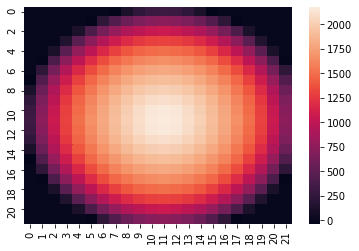

In [3]:
#Define Lightbulb Heatmap
import numpy as np
from random import random
import math
import seaborn as sns

#Distance between lights and class in cm
distance_light = 35

#loop over each "element" in small array that will see light at the given distance
light_degrees = 18.5 #To either side
r_light_circle = distance_light * math.tan(light_degrees*(math.pi/180))
print("Radius of light: " + str(r_light_circle))
dim_light = int(r_light_circle)
intensities = np.zeros([2*dim_light, 2*dim_light])
for x in range(int(-r_light_circle), int(r_light_circle)):
    for y in range(int(-r_light_circle), int(r_light_circle)):
        distance = math.sqrt(x**2 + y**2)
        angle = math.atan(distance/distance_light)
        angle_deg = angle*180/math.pi
        if distance < r_light_circle:
            intensity = -0.0199*(1.25*angle_deg)**4 + 0.6398*(1.25*angle_deg)**3 - 8.8605*(1.25*angle_deg)**2 + 12.453*(1.25*angle_deg) + 2178.1
            intensities[x + int(-r_light_circle), y + int(-r_light_circle)] = intensity*math.cos(angle)**3
            #round(math.cos(angle)**3,3)
sns.heatmap(intensities)

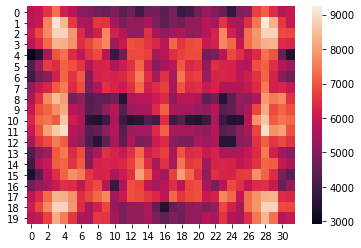

In [20]:
#Random
import matplotlib.pyplot as plt
plt.show()

#best_std = 100000
for k in range(0, 300000):
    #Resolution 5mm
    array_big = np.zeros([int(120/5),int(180/5)]) #centre at (49,99)
    array_small = np.zeros([int(1000/5),int(1600/5)]) #centre at (499,999)
    #calc everything for (0,0) and then move by offsets
    offset_y = int(array_small.shape[0]/2-1) 
    offset_x = int(array_small.shape[1]/2-1) 
    offset_y_big = int(array_big.shape[0]/2-1)
    offset_x_big = int(array_big.shape[1]/2-1)
    #print(offset_y, offset_x)
    for light in range(0,20):
        x_coord = int(random()*offset_x_big) #random x coord for 1 quadrant
        y_coord = int(random()*offset_y_big) #random y coord for 1 quadrant
        #mark location of light bulbs
        a = offset_y_big + y_coord
        b = offset_x_big + x_coord
        c = offset_x_big - x_coord
        d = offset_y_big - y_coord
        
        if array_big[a, b] != 1:
            array_big[a, b] = 1
            array_big[a, c] = 1
            array_big[d, b] = 1
            array_big[d, c] = 1
            
            #sns.heatmap(array_big)

            a2 = offset_y + y_coord
            b2 = offset_x + x_coord
            c2 = offset_x - x_coord
            d2 = offset_y - y_coord

            #add the intensity matrix on top of existing intensity (small_array)
            #find indices to slice 2d small_array
            array_small[a2-dim_light:a2+dim_light, b2-dim_light:b2+dim_light] += intensities
            array_small[a2-dim_light:a2+dim_light, c2-dim_light:c2+dim_light] += intensities
            array_small[d2-dim_light:d2+dim_light, b2-dim_light:b2+dim_light] += intensities
            array_small[d2-dim_light:d2+dim_light, c2-dim_light:c2+dim_light] += intensities
       
        
        #sns.heatmap(best_array_small[offset_y-20:offset_y+20,offset_x-40:offset_x+40])
    #std = array_small[offset_y-20:offset_y+20,offset_x-40:offset_x+40].std()
    std = array_small[offset_y-int(50/5):offset_y+int(50/5),offset_x-int(80/5):offset_x+int(80/5)].std()
    if std < best_std:
        best_std = std
        best_array_small = array_small
        best_array_big = array_big
        print(best_std)
sns.heatmap(best_array_small[offset_y-int(50/5):offset_y+int(50/5),offset_x-int(80/5):offset_x+int(80/5)])
plt.show()
#sns.heatmap(array_small[offset_y-20:offset_y+20,offset_x-40:offset_x+40])

#sns.heatmap(best_array_big)

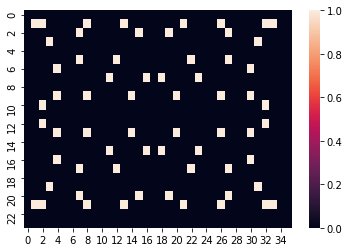

In [17]:
sns.heatmap(best_array_big)
np.savetxt("big_array.csv", best_array_big, delimiter = ",")

4984.125692616009
4266.940989838062


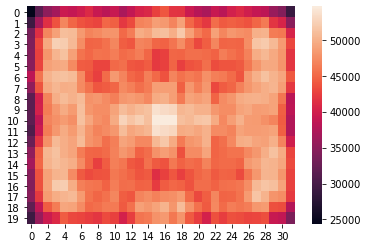

In [47]:
#Random
import matplotlib.pyplot as plt
plt.show()

best_std = 100000
for k in range(0, 100):
    #Resolution 5mm
    array_big = np.zeros([int(125/5),int(185/5)]) #centre at (49,99)
    array_small = np.zeros([int(1005/5),int(1605/5)]) #centre at (499,999)
    #calc everything for (0,0) and then move by offsets
    offset_y = int(array_small.shape[0]/2-1) 
    offset_x = int(array_small.shape[1]/2-1) 
    offset_y_big = int(array_big.shape[0]/2)
    offset_x_big = int(array_big.shape[1]/2)

    #print(offset_y, offset_x)
    for light in range(0,200):
        x_coord = int(random()*offset_x_big) #random x coord for 1 quadrant
        y_coord = int(random()*offset_y_big) #random y coord for 1 quadrant
        #mark location of light bulbs
        a = offset_y_big + y_coord
        b = offset_x_big + x_coord
        c = offset_x_big - x_coord
        d = offset_y_big - y_coord
        
        if array_big[a, b] != 1:
            array_big[a, b] = 1
            array_big[a, c] = 1
            array_big[d, b] = 1
            array_big[d, c] = 1
            
            #sns.heatmap(array_big)

            a2 = offset_y + y_coord
            b2 = offset_x + x_coord
            c2 = offset_x - x_coord
            d2 = offset_y - y_coord

            #add the intensity matrix on top of existing intensity (small_array)
            #find indices to slice 2d small_array
            if y_coord == 0: 
                array_small[d2-dim_light:d2+dim_light, b2-dim_light:b2+dim_light] -= intensities
                array_small[d2-dim_light:d2+dim_light, c2-dim_light:c2+dim_light] -= intensities
            if x_coord == 0:
                array_small[a2-dim_light:a2+dim_light, c2-dim_light:c2+dim_light] -= intensities
                array_small[d2-dim_light:d2+dim_light, c2-dim_light:c2+dim_light] -= intensities
            array_small[a2-dim_light:a2+dim_light, b2-dim_light:b2+dim_light] += intensities
            array_small[a2-dim_light:a2+dim_light, c2-dim_light:c2+dim_light] += intensities
            array_small[d2-dim_light:d2+dim_light, b2-dim_light:b2+dim_light] += intensities
            array_small[d2-dim_light:d2+dim_light, c2-dim_light:c2+dim_light] += intensities
       
        
        #sns.heatmap(best_array_small[offset_y-20:offset_y+20,offset_x-40:offset_x+40])
    #std = array_small[offset_y-20:offset_y+20,offset_x-40:offset_x+40].std()
    std = array_small[offset_y-int(50/5):offset_y+int(50/5),offset_x-int(80/5):offset_x+int(80/5)].std()
    if std < best_std:
        best_std = std
        best_array_small = array_small
        best_array_big = array_big
        print(best_std)
sns.heatmap(best_array_small[offset_y-int(50/5):offset_y+int(50/5),offset_x-int(80/5):offset_x+int(80/5)])
plt.show()
#sns.heatmap(array_small[offset_y-20:offset_y+20,offset_x-40:offset_x+40])

#sns.heatmap(best_array_big)

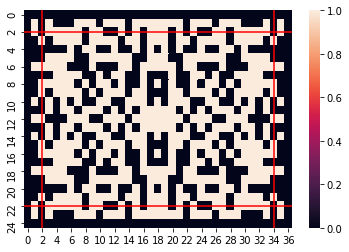

In [48]:
ax = sns.heatmap(best_array_big)
ax.hlines([2.5, 22.5], *ax.get_xlim(), colors = "r")
ax.vlines([2.5, 34.5], *ax.get_xlim(), colors = "r")
np.savetxt("big_array.csv", best_array_big, delimiter = ",")

5
497.6104850468149
1.0


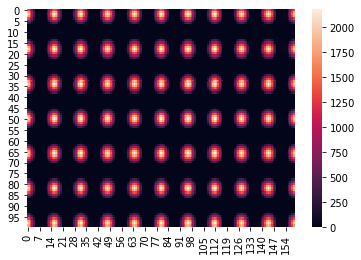

6
7
8
9
10
11
444.9778256973587
0.9834916715956312


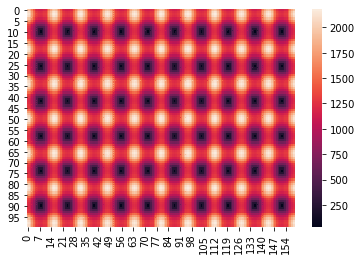

12
348.7068573214915
0.7076977605056471


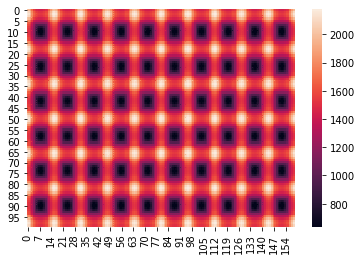

13
240.14043343760147
0.445505680809673


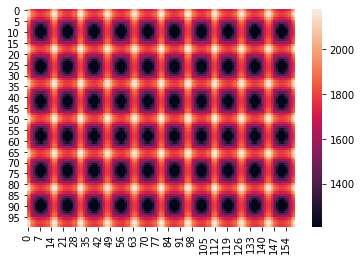

14
128.26117106353018
0.22793446804709958


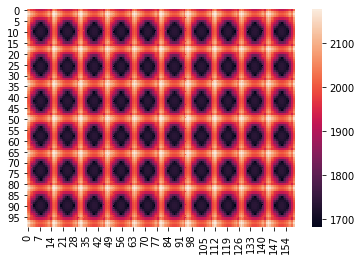

15
47.36643860774248
0.09350306944306544


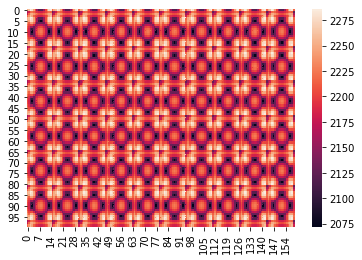

16
17
18
19
20
64.00861733483735
0.07151671819643166


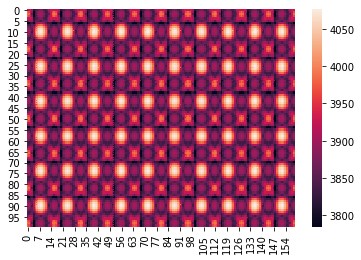

21
47.10541457934246
0.040976301554380375


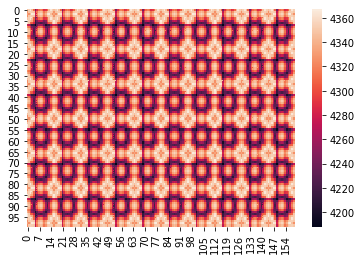

22
23
24
25
26
27
28
29
77.35348764471719
0.03701975647468825


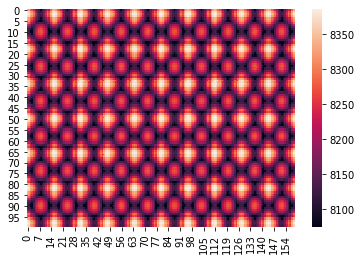

30
47.51824246538095
0.02418045501402777


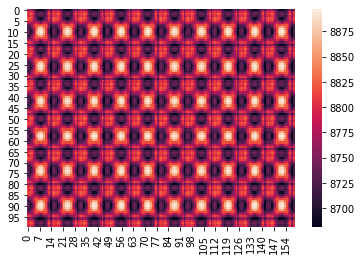

31
32
33
34
35
36
37
38
39


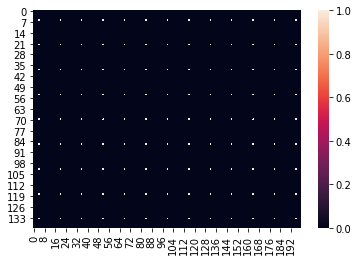

In [55]:
best_std = 100000
best_max_min = 10000
import matplotlib.pyplot as plt
best_array_big = np.zeros([int(400),int(600)]) #centre at (49,99)
best_array_small = np.zeros([int(300),int(400)]) #centre at (499,999)

for Range in range(5,40):
    print(Range)
    #Define Lightbulb Heatmap
    import numpy as np
    from random import random
    import math
    import seaborn as sns

    #Distance between lights and class in cm
    distance_light = Range

    #loop over each "element" in small array that will see light at the given distance
    light_degrees = 45.9 #To either side
    r_light_circle = distance_light * math.tan(light_degrees*(math.pi/180))
    #print("Radius of light: " + str(r_light_circle))
    dim_light = int(r_light_circle)
    intensities = np.zeros([2*dim_light, 2*dim_light])
    for x in range(int(-r_light_circle), int(r_light_circle)):
        for y in range(int(-r_light_circle), int(r_light_circle)):
            distance = math.sqrt(x**2 + y**2)
            angle = math.atan(distance/distance_light)
            angle_deg = angle*180/math.pi
            if distance < r_light_circle:
                intensity = -0.0199*(0.5*angle_deg)**4 + 0.6398*(0.5*angle_deg)**3 - 8.8605*(0.5*angle_deg)**2 + 12.453*(0.5*angle_deg) + 2178.1
                intensities[x + int(-r_light_circle), y + int(-r_light_circle)] = intensity*math.cos(angle)**3
                #round(math.cos(angle)**3,3)




    #Resolution 5mm
    array_big = np.zeros([int(400),int(600)]) #centre at (49,99)
    array_small = np.zeros([int(300),int(400)]) #centre at (499,999)
    #calc everything for (0,0) and then move by offsets
    offset_y = int(array_small.shape[0]/2-1) 
    offset_x = int(array_small.shape[1]/2-1) 
    offset_y_big = int(array_big.shape[0]/2-1)
    offset_x_big = int(array_big.shape[1]/2-1)

    lamp_spacing = 16

    for x_coord in range(0,7):
        for y_coord in range(0,5):
        #mark location of light bulbs
            a = offset_y_big + y_coord*lamp_spacing
            b = offset_x_big + x_coord*lamp_spacing
            c = offset_x_big - x_coord*lamp_spacing
            d = offset_y_big - y_coord*lamp_spacing
            array_big[a, b] = 1
            array_big[a, c] = 1
            array_big[d, b] = 1
            array_big[d, c] = 1

            #sns.heatmap(array_big)

            a2 = offset_y + y_coord*lamp_spacing
            b2 = offset_x + x_coord*lamp_spacing
            c2 = offset_x - x_coord*lamp_spacing
            d2 = offset_y - y_coord*lamp_spacing

            #add the intensity matrix on top of existing intensity (small_array)
            #find indices to slice 2d small_array
            if y_coord == 0: 
                array_small[d2-dim_light:d2+dim_light, b2-dim_light:b2+dim_light] -= intensities
                array_small[d2-dim_light:d2+dim_light, c2-dim_light:c2+dim_light] -= intensities
            if x_coord == 0:
                array_small[a2-dim_light:a2+dim_light, c2-dim_light:c2+dim_light] -= intensities
                array_small[d2-dim_light:d2+dim_light, c2-dim_light:c2+dim_light] -= intensities
            if x_coord == 0 and y_coord == 0:
                array_small[a2-dim_light:a2+dim_light, b2-dim_light:b2+dim_light] += intensities
            array_small[a2-dim_light:a2+dim_light, b2-dim_light:b2+dim_light] += intensities
            array_small[a2-dim_light:a2+dim_light, c2-dim_light:c2+dim_light] += intensities
            array_small[d2-dim_light:d2+dim_light, b2-dim_light:b2+dim_light] += intensities
            array_small[d2-dim_light:d2+dim_light, c2-dim_light:c2+dim_light] += intensities


        #sns.heatmap(best_array_small[offset_y-20:offset_y+20,offset_x-40:offset_x+40])
    #std = array_small[offset_y-20:offset_y+20,offset_x-40:offset_x+40].std()
    std = array_small[offset_y-int(50):offset_y+int(50),offset_x-int(80):offset_x+int(80)].std()
    maximum = array_small[offset_y-int(50):offset_y+int(50),offset_x-int(80):offset_x+int(80)].max()
    minimum = array_small[offset_y-int(50):offset_y+int(50),offset_x-int(80):offset_x+int(80)].min()
    max_min = (maximum - minimum)/maximum
    if  max_min < best_max_min: #std < best_std:
        best_max_min = max_min
        best_std = std
        best_array_small = array_small
        best_array_big = array_big
        
        print(best_std)
        print(max_min)
        sns.heatmap(best_array_small[offset_y-int(50):offset_y+int(50),offset_x-int(80):offset_x+int(80)])
        plt.show()
#sns.heatmap(best_array_small[offset_y-int(50):offset_y+int(50),offset_x-int(80):offset_x+int(80)])
sns.heatmap(best_array_big[offset_y_big-int(70):offset_y_big+int(70),offset_x_big-int(100):offset_x_big+int(100)])
#sns.heatmap(best_array_big)

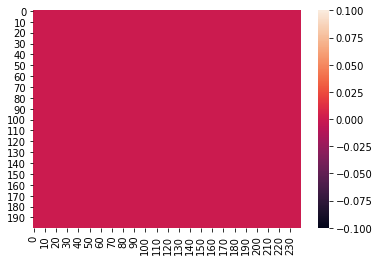

In [13]:
ax = sns.heatmap(best_array_big[offset_y-int(100):offset_y+int(100),offset_x-int(120):offset_x+int(120)])
np.savetxt("big_array.csv", best_array_big, delimiter = ",")

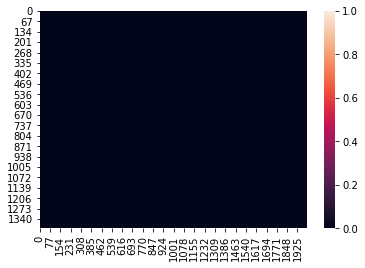

In [2]:
sns.heatmap(best_array_big)